### 목표
- 실제 데이터인 mpg 데이터의 특징을 파악하고 분석
- 1999 ~ 2008년 출시된 자동차 정보 234종 정보
- mpg(mile per gallon): 연비, 미국 환경 보호국에서 공개한 데이터
  - 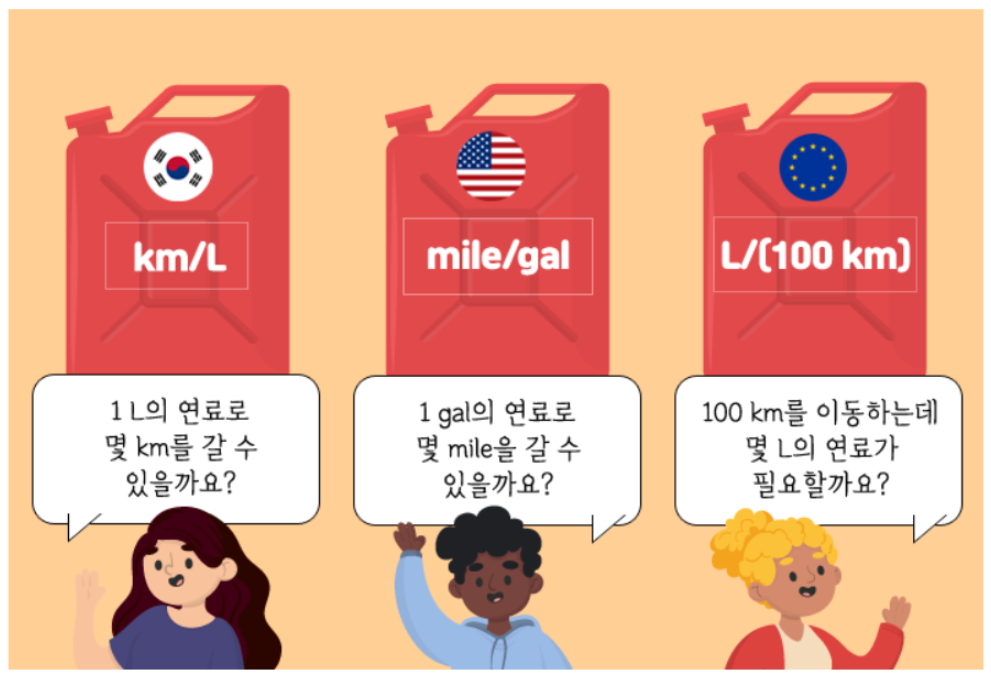

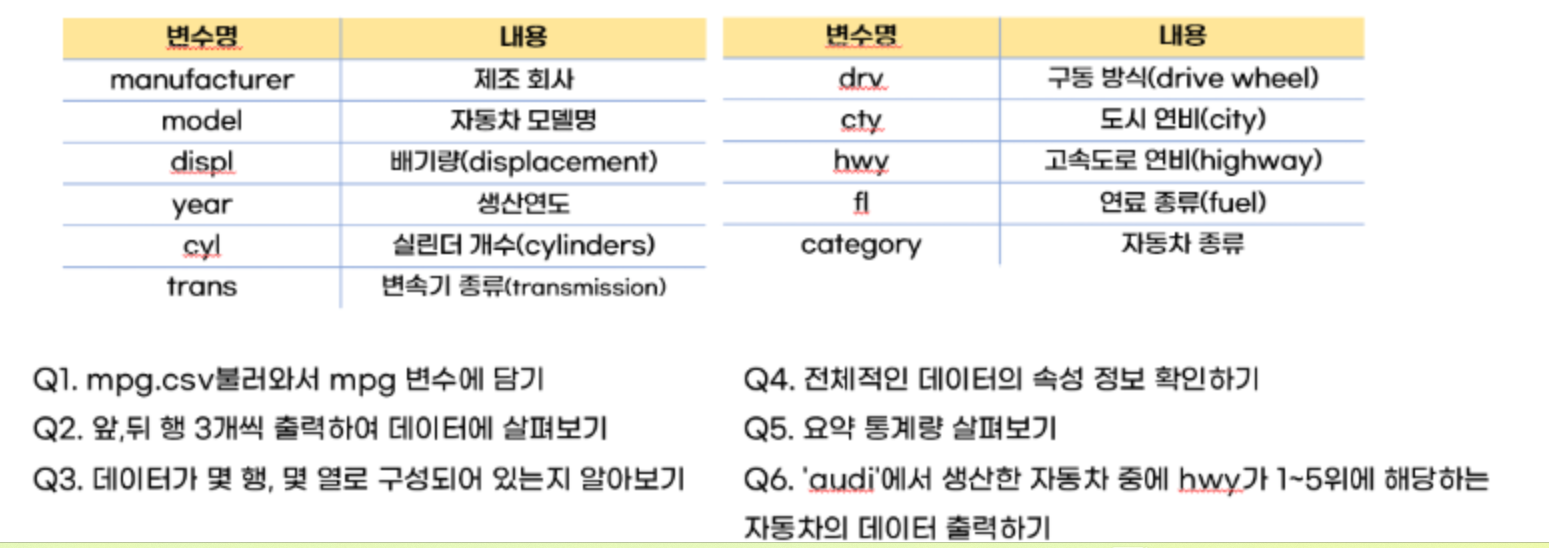

In [237]:
import numpy as np
import pandas as pd

In [10]:
mpg = pd.read_csv('data/mpg.csv')

mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [16]:
# q2. 앞에서 행 3개 출력
mpg.head(3) # 기본값은 5
mpg.tail(3)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize
233,volkswagen,passat,3.6,2008,6,auto(s6),f,17,26,p,midsize


In [18]:
# q3. 행열 크기 확인
mpg.shape

(234, 11)

In [46]:
# q4. 전체적인 데이터의 속성 정보 확인하기
mpg.info()

# 결측치가 있는 경우
# 1. 삭제(해당 열이 큰 의미가 없을 경우)
# 2. 대체 - 평균, 중앙값, 최빈값(최고빈도 값), 다른 컬럼간의 관계를 찾아서 채워넣음

# object: 문자열
# float: 실수
# int: 정수

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  category      234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 20.2+ KB


In [58]:
# q5. 요약 통계량 살펴보기
# describe
# 문자열 자료형은 자동으로 제외
mpg.describe()

# mean: 평균
# std: 표준편차(평균값으로부터 데이터들이 평균적으로 얼마만큼 떨어져 있는지)
# min: 최소값
# 25%, 50%, 75%: 사분이수, 각각 하위 25%, 하위 50%, 하위 75%
# max: 최고값

,displ,year,cyl,cty,hwy
count,234.000000,234.000000,234.000000,234.000000,234.000000
mean,3.471795,2003.500000,5.888889,16.858974,23.440171
std,1.291959,4.509646,1.611534,4.255946,5.954643
min,1.600000,1999.000000,4.000000,9.000000,12.000000
25%,2.400000,1999.000000,4.000000,14.000000,18.000000
50%,3.300000,2003.500000,6.000000,17.000000,24.000000
75%,4.600000,2008.000000,8.000000,19.000000,27.000000
max,7.000000,2008.000000,8.000000,35.000000,44.000000


In [66]:
mpg[['manufacturer', 'model']].describe()
# 이런식으로 문자열 데이터 밖에 없는 경우에는 강제로 실행
# count: 행의 개수
# unique: 중복값을 제거한 나머지 값
# top: 제일 많이 나온값
# freq: 제일 많이 나온값의 개수

,manufacturer,model
count,234,234
unique,15,38
top,dodge,caravan 2wd
freq,37,11


In [70]:
# 특정 값 기준으로 오름차순 해주는 함수
# sort_values
mpg.sort_values('year')

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
117,hyundai,tiburon,2.0,2008,4,manual(m5),f,20,28,r,subcompact
120,hyundai,tiburon,2.7,2008,6,manual(m6),f,16,24,r,subcompact
122,jeep,grand cherokee 4wd,3.0,2008,6,auto(l5),4,17,22,d,suv
123,jeep,grand cherokee 4wd,3.7,2008,6,auto(l5),4,15,19,r,suv
126,jeep,grand cherokee 4wd,4.7,2008,8,auto(l5),4,9,12,e,suv
...,...,...,...,...,...,...,...,...,...,...,...
130,land rover,range rover,4.0,1999,8,auto(l4),4,11,15,p,suv
50,dodge,dakota pickup 4wd,3.9,1999,6,auto(l4),4,13,17,r,pickup
51,dodge,dakota pickup 4wd,3.9,1999,6,manual(m5),4,14,17,r,pickup
125,jeep,grand cherokee 4wd,4.7,1999,8,auto(l4),4,14,17,r,suv


In [72]:
# 내림차순
mpg.sort_values('year', ascending = False)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
117,hyundai,tiburon,2.0,2008,4,manual(m5),f,20,28,r,subcompact
120,hyundai,tiburon,2.7,2008,6,manual(m6),f,16,24,r,subcompact
122,jeep,grand cherokee 4wd,3.0,2008,6,auto(l5),4,17,22,d,suv
123,jeep,grand cherokee 4wd,3.7,2008,6,auto(l5),4,15,19,r,suv
126,jeep,grand cherokee 4wd,4.7,2008,8,auto(l5),4,9,12,e,suv
...,...,...,...,...,...,...,...,...,...,...,...
130,land rover,range rover,4.0,1999,8,auto(l4),4,11,15,p,suv
50,dodge,dakota pickup 4wd,3.9,1999,6,auto(l4),4,13,17,r,pickup
51,dodge,dakota pickup 4wd,3.9,1999,6,manual(m5),4,14,17,r,pickup
125,jeep,grand cherokee 4wd,4.7,1999,8,auto(l4),4,14,17,r,suv


In [74]:
# q6. audi에서 생산한 자동차 중 hwy가 1-5위에 해당하는 데이터 출력하기
# 제조사가 audi인 데이터에 접근
audi = mpg[mpg['manufacturer'] == 'audi']
audi

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
5,audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact
6,audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact
7,audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact
8,audi,a4 quattro,1.8,1999,4,auto(l5),4,16,25,p,compact
9,audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28,p,compact


In [76]:
# hwy 컬럼 기눙 내림차순 정렬(sort_values)
audi_sort = audi.sort_values('hwy', ascending = False)
# 상위 5개 출력(head)
audi_sort.head(5)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
9,audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28,p,compact


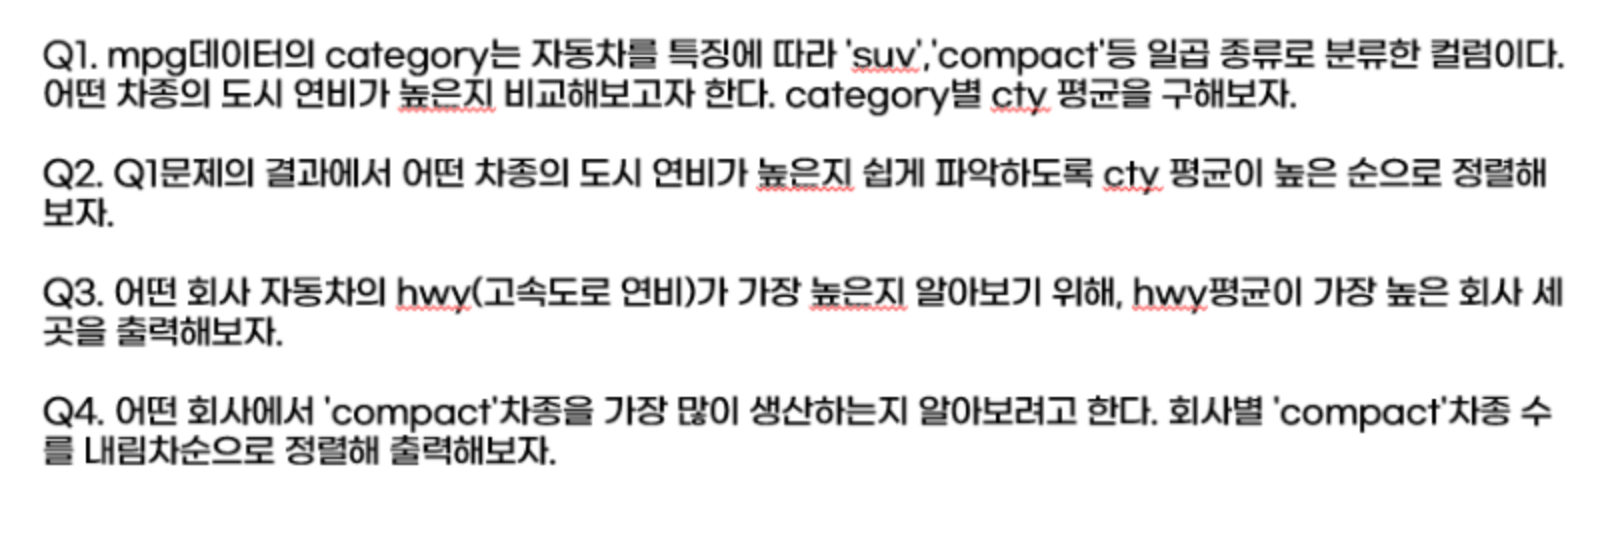

In [81]:
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [83]:
# q1. category 별 cty의 평균 구하기
mpg['category'].value_counts()

category
suv           62
compact       47
midsize       41
subcompact    35
pickup        33
minivan       11
2seater        5
Name: count, dtype: int64

In [85]:
mpg[['category', 'cty']]

,category,cty
0,compact,18
1,compact,21
2,compact,20
3,compact,21
4,compact,16
...,...,...
229,midsize,19
230,midsize,21
231,midsize,16
232,midsize,18


In [93]:
# 카테고리별 평균
# groupby: 집계함수와 같이 사용됨
cty_mean = mpg[['category', 'cty']].groupby('category').mean().round(2)
                                    # 카테고리별          평균

cty_mean

,cty
category,
2seater,15.40
compact,20.13
midsize,18.76
minivan,15.82
pickup,13.00
subcompact,20.37
suv,13.50


In [95]:
# q2. cty 평균이 높은 순으로 정렬

cty_mean.sort_values('cty', ascending = False)

,cty
category,
subcompact,20.37
compact,20.13
midsize,18.76
minivan,15.82
2seater,15.40
suv,13.50
pickup,13.00


In [97]:
# q3. hwy 평균이 가장 높은 회사 3곳 출력

hwy = mpg[['manufacturer', 'hwy']]
hwy

,manufacturer,hwy
0,audi,29
1,audi,29
2,audi,31
3,audi,30
4,audi,26
...,...,...
229,volkswagen,28
230,volkswagen,29
231,volkswagen,26
232,volkswagen,26


In [105]:
hwy_mean = hwy.groupby('manufacturer').mean().sort_values('hwy', ascending = False).head(3)

hwy_mean

,hwy
manufacturer,
honda,32.555556
volkswagen,29.222222
hyundai,26.857143


In [162]:
# q4. 회사별 compact 차종 수를 내림차순으로 정렬해서 출력

'''
b. category == "compact" 인 데이터
2. 에서 manufacturer, category 데이터
3. 에서 groupby('제조사별') .count()
4. 에서 category(개수) 별로 내림차순
'''

compact = compact[compact['category'] == 'compact'][['manufacturer', 'category']]
compact

# 한 줄로 작성
# compact[compact['category'] == 'compact'][['manufacturer', 'category']].groupby('manufacturer').count().sort_values('category', ascending = False)

,manufacturer,category
0,audi,compact
1,audi,compact
2,audi,compact
3,audi,compact
4,audi,compact
5,audi,compact
6,audi,compact
7,audi,compact
8,audi,compact
9,audi,compact


In [146]:
compact_count = compact.groupby('manufacturer').count().sort_values('category', ascending = False)
compact_count

,category
manufacturer,
audi,1
nissan,1
subaru,1
toyota,1
volkswagen,1


### 특정 제조사들의 데이터 살펴보기
- toyota, ford, audi, hyundai, honda

In [167]:
# 제조사
mpg['manufacturer'].value_counts()

manufacturer
dodge         37
toyota        34
volkswagen    27
ford          25
chevrolet     19
audi          18
hyundai       14
subaru        14
nissan        13
honda          9
jeep           8
pontiac        5
land rover     4
mercury        4
lincoln        3
Name: count, dtype: int64

In [190]:
# 방법 1
# 제조사가 totyota 인 데이터
toyota = mpg[mpg['manufacturer'] == 'toyota']
# 제조사가 ford 인 데이터
ford = mpg[mpg['manufacturer'] == 'ford']
# 제조사가 audi 인 데이터
hyundai = mpg[mpg['manufacturer'] == 'audi']
# 제조사가 audi 인 데이터
hyundai = mpg[mpg['manufacturer'] == 'hyundai']
# 제조사가 honda 인 데이터
honda = mpg[mpg['manufacturer'] == 'honda']

In [192]:
# 제조사가 toyota, ford, audi, hyundai, honda
total = pd.concat([toyota, ford, audi, hyundai, honda])
total

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
173,toyota,4runner 4wd,2.7,1999,4,manual(m5),4,15,20,r,suv
174,toyota,4runner 4wd,2.7,1999,4,auto(l4),4,16,20,r,suv
175,toyota,4runner 4wd,3.4,1999,6,auto(l4),4,15,19,r,suv
176,toyota,4runner 4wd,3.4,1999,6,manual(m5),4,15,17,r,suv
177,toyota,4runner 4wd,4.0,2008,6,auto(l5),4,16,20,r,suv
...,...,...,...,...,...,...,...,...,...,...,...
103,honda,civic,1.6,1999,4,auto(l4),f,24,32,r,subcompact
104,honda,civic,1.8,2008,4,manual(m5),f,26,34,r,subcompact
105,honda,civic,1.8,2008,4,auto(l5),f,25,36,r,subcompact
106,honda,civic,1.8,2008,4,auto(l5),f,24,36,c,subcompact


In [ ]:
# 방법 2
# 제조사가 toyota, ford, audi, hyundai, honda
# 조건식
# or(|) 사용
# (mpg['manufacturer'] == 'toyota' | mpg['manufacturer'] == 'ford' | mpg['manufacturer'] == 'audi' | mpg['manufacturer'] == 'hyundai' | mpg['manufacturer'] == 'toyota')

In [222]:
# 방법 3
# 제조사가 toyota, ford, audi, hyundai, honda
# 조건식
# isin: 포함 여부를 판단하는 함수

mpg[mpg['manufacturer'].isin(['toyota', 'ford', 'audi', 'hyundai', 'honda'])]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
202,toyota,toyota tacoma 4wd,2.7,2008,4,manual(m5),4,17,22,r,pickup
203,toyota,toyota tacoma 4wd,3.4,1999,6,manual(m5),4,15,17,r,pickup
204,toyota,toyota tacoma 4wd,3.4,1999,6,auto(l4),4,15,19,r,pickup
205,toyota,toyota tacoma 4wd,4.0,2008,6,manual(m6),4,15,18,r,pickup


In [228]:
# 방법 4
# manufacturer 열을 인덱스로 지정
mpg_manu = mpg.set_index('manufacturer')
total4 = mpg_manu.loc[['toyota', 'ford', 'audi', 'hyundai', 'honda']]
total4

,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
manufacturer,,,,,,,,,,
toyota,4runner 4wd,2.7,1999,4,manual(m5),4,15,20,r,suv
toyota,4runner 4wd,2.7,1999,4,auto(l4),4,16,20,r,suv
toyota,4runner 4wd,3.4,1999,6,auto(l4),4,15,19,r,suv
toyota,4runner 4wd,3.4,1999,6,manual(m5),4,15,17,r,suv
toyota,4runner 4wd,4.0,2008,6,auto(l5),4,16,20,r,suv
...,...,...,...,...,...,...,...,...,...,...
honda,civic,1.6,1999,4,auto(l4),f,24,32,r,subcompact
honda,civic,1.8,2008,4,manual(m5),f,26,34,r,subcompact
honda,civic,1.8,2008,4,auto(l5),f,25,36,r,subcompact


In [234]:
# 인덱스 다시 번호로
# reset_index(): 기본 숫자형 인덱스로 변환
total4.reset_index(inplace = True)
total4

,index,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,0,toyota,4runner 4wd,2.7,1999,4,manual(m5),4,15,20,r,suv
1,1,toyota,4runner 4wd,2.7,1999,4,auto(l4),4,16,20,r,suv
2,2,toyota,4runner 4wd,3.4,1999,6,auto(l4),4,15,19,r,suv
3,3,toyota,4runner 4wd,3.4,1999,6,manual(m5),4,15,17,r,suv
4,4,toyota,4runner 4wd,4.0,2008,6,auto(l5),4,16,20,r,suv
...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,honda,civic,1.6,1999,4,auto(l4),f,24,32,r,subcompact
96,96,honda,civic,1.8,2008,4,manual(m5),f,26,34,r,subcompact
97,97,honda,civic,1.8,2008,4,auto(l5),f,25,36,r,subcompact
98,98,honda,civic,1.8,2008,4,auto(l5),f,24,36,c,subcompact


### 5개 제조사별로 생산하는 자동차 종류를 시각화

In [240]:
import matplotlib.pyplot as plt
import seaborn as sns # 시각화 도구

In [244]:
total['category'].value_counts()

category
compact       27
subcompact    25
suv           17
midsize       17
pickup        14
Name: count, dtype: int64

<Axes: xlabel='manufacturer', ylabel='count'>

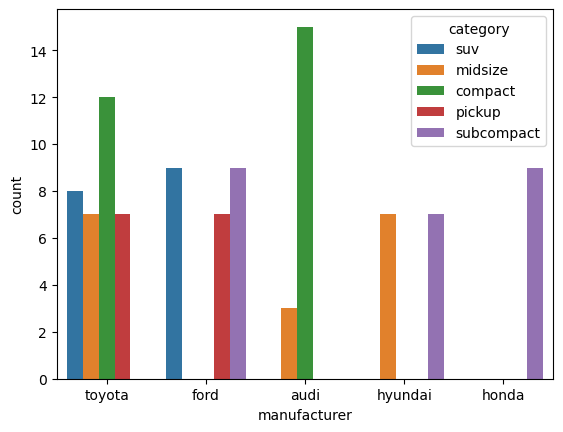

In [250]:
# sns.countplot(data = , x = , hue = )
# x: x값
# hue: 분할 기준(나타내고자 하는 것)
# y 값은 알아서 개수를 파악해서 시각화 진행

sns.countplot(data = total, x = 'manufacturer', hue = 'category')
# x축: 제조사
# 분할기준: 자동차 종류(종류별로 분할해서 개수를 나타내라)

In [ ]:
# 만약 데이터가 결측치가 있을 경우 참고하기 좋음
# 결측치는 일반적으로 평균, 종합값, 최빈값을 넣을 수 있지만,
# 시각화 데이터 분석